In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.shape

(305354, 2)

In [4]:
df = df.drop_duplicates()

In [5]:
df.shape

(305354, 2)

In [6]:
df = df.dropna()

In [8]:
df.shape

(305354, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305354 entries, 0 to 305353
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   comment  305354 non-null  object
 1   label    305354 non-null  object
dtypes: object(2)
memory usage: 4.7+ MB


In [4]:
df['len_w'] = [10*(len(c.split(' '))//10) for c in df['comment']]
df['len_c'] = 100*(df['comment'].str.len()//100)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305354 entries, 0 to 305353
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   comment  305354 non-null  object
 1   label    305354 non-null  object
 2   len_w    305354 non-null  int64 
 3   len_c    305354 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 9.3+ MB


In [6]:
df.describe()

,len_w,len_c
count,305354.000000,305354.000000
mean,7.129234,19.092922
std,13.413203,81.295724
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,10.000000,0.000000
max,1360.000000,9700.000000


<Axes: title={'center': 'No of comments in each label'}, xlabel='label'>

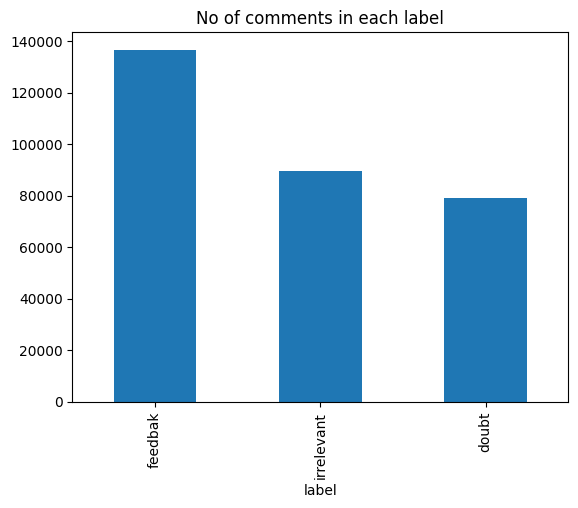

In [7]:
df['label'].value_counts().plot(kind='bar', title='No of comments in each label')

<Axes: title={'center': 'Length of comment VS Frequency'}, xlabel='len_c'>

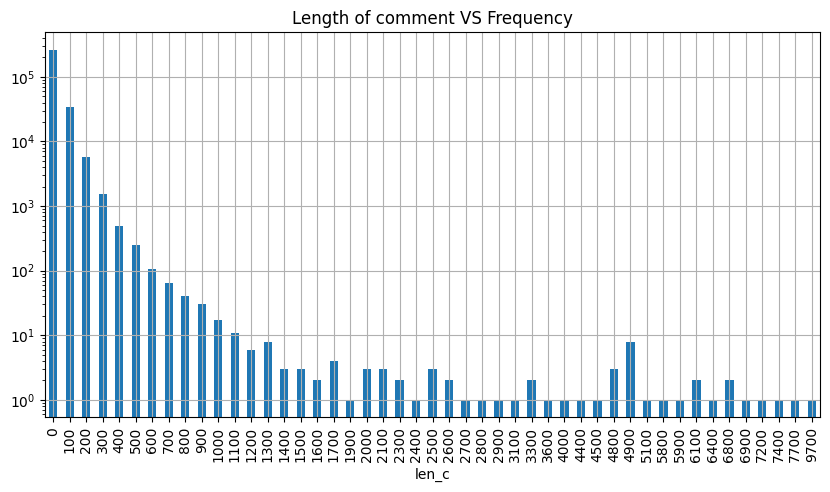

In [8]:
df['len_c'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), logy=True, grid=True, title='Length of comment VS Frequency')

<Axes: title={'center': 'No of words in comment VS Frequency'}, xlabel='len_w'>

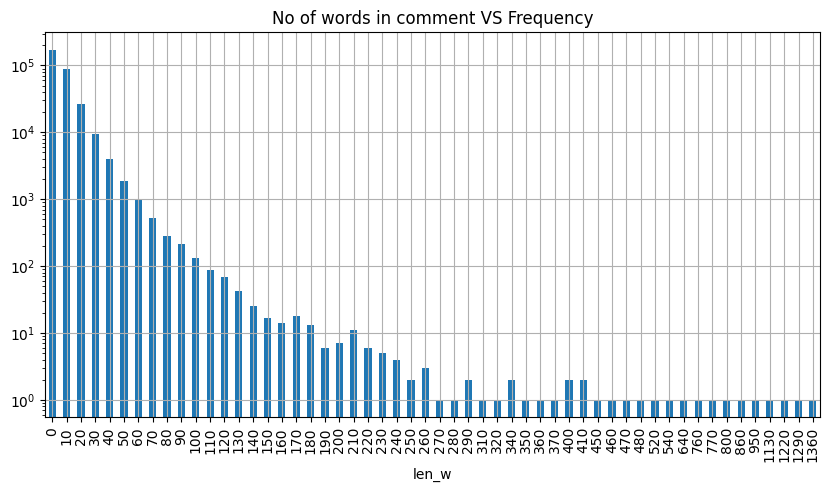

In [9]:
df['len_w'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), logy=True, grid=True, title='No of words in comment VS Frequency')

In [10]:
df_grouped = df.groupby(['label'])

In [11]:
df_grouped.describe()

len_w                                                     \
               count      mean        std  min  25%   50%   75%     max   
label                                                                     
doubt        79139.0  9.220233  12.891978  0.0  0.0  10.0  10.0   360.0   
feedbak     136629.0  7.717615  12.754210  0.0  0.0   0.0  10.0  1220.0   
irrelevant   89586.0  4.384725  14.366858  0.0  0.0   0.0  10.0  1360.0   

               len_c                                                     
               count       mean         std  min  25%  50%  75%     max  
label                                                                    
doubt        79139.0  24.134750   61.422174  0.0  0.0  0.0  0.0  1700.0  
feedbak     136629.0  21.193158   65.790157  0.0  0.0  0.0  0.0  7400.0  
irrelevant   89586.0  11.435939  111.826429  0.0  0.0  0.0  0.0  9700.0

In [12]:
df_grouped['len_c'].mean()/df_grouped['len_w'].mean()

label
doubt         2.617586
feedbak       2.746076
irrelevant    2.608131
dtype: float64

<Axes: title={'center': 'Length of doubt comment VS Frequency'}, xlabel='len_c'>

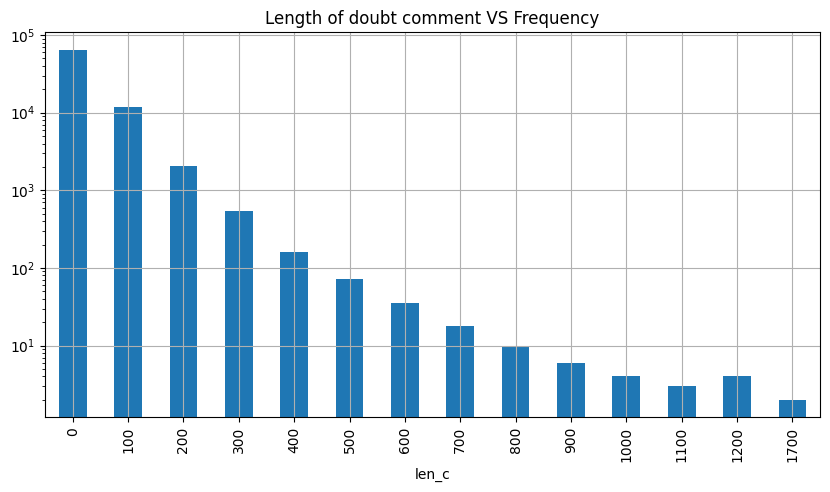

In [13]:
df[df['label']=='doubt']['len_c'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), logy=True, grid=True, title='Length of doubt comment VS Frequency')

<Axes: title={'center': 'No of words in doubt comment VS Frequency'}, xlabel='len_w'>

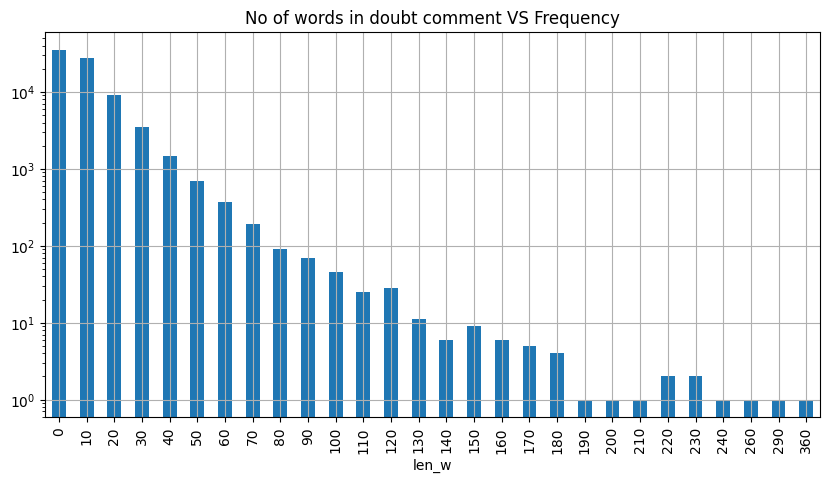

In [14]:
df[df['label']=='doubt']['len_w'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), logy=True, grid=True, title='No of words in doubt comment VS Frequency')

<Axes: title={'center': 'Length of feedbak comment VS Frequency'}, xlabel='len_c'>

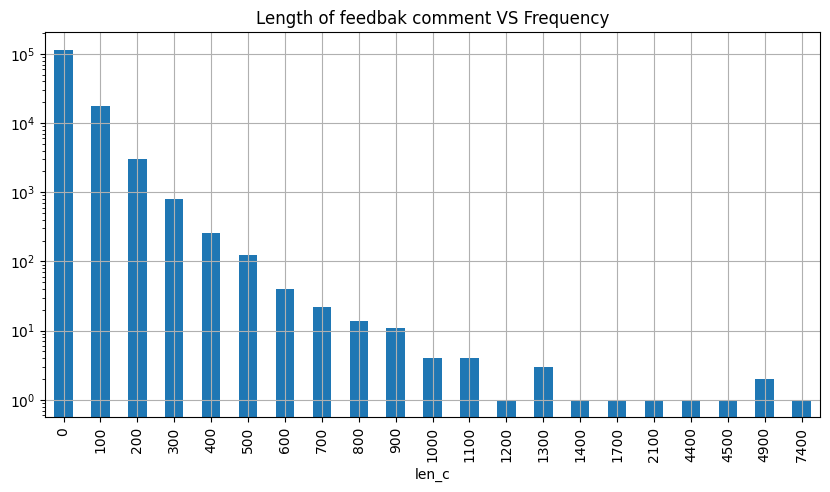

In [15]:
df[df['label']=='feedbak']['len_c'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), logy=True, grid=True, title='Length of feedbak comment VS Frequency')

<Axes: title={'center': 'No of words in doubt comment VS Frequency'}, xlabel='len_w'>

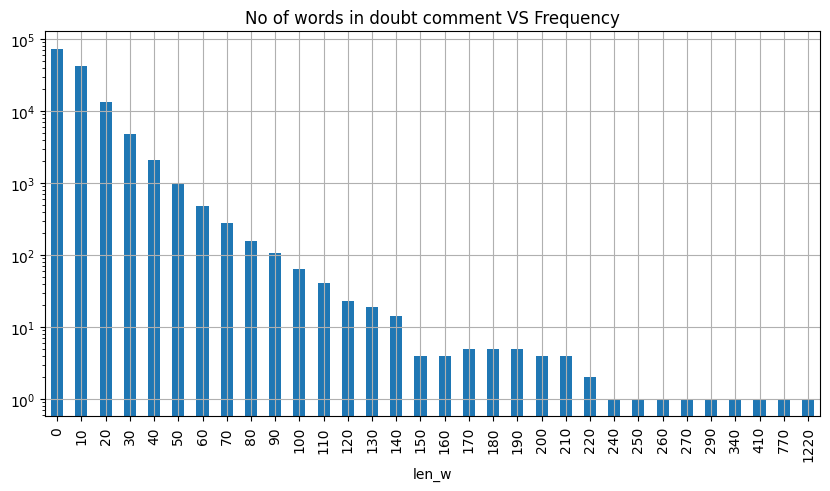

In [16]:
df[df['label']=='feedbak']['len_w'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), logy=True, grid=True, title='No of words in doubt comment VS Frequency')

<Axes: title={'center': 'Length of irrelevant comment VS Frequency'}, xlabel='len_c'>

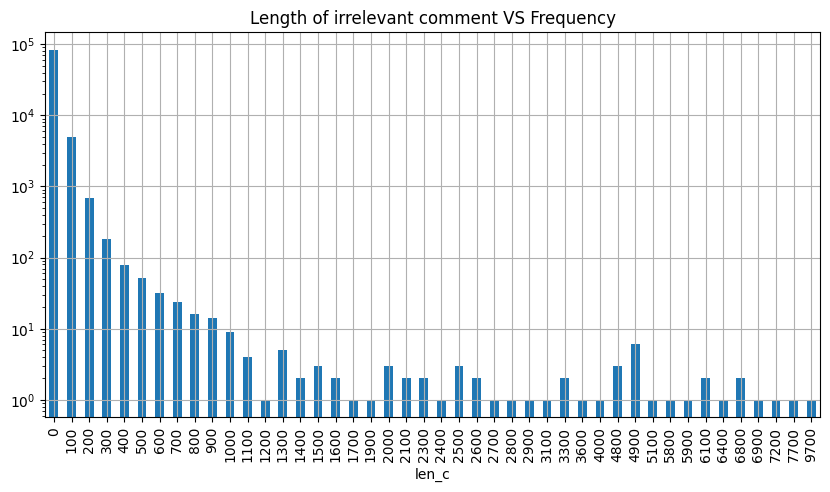

In [17]:
df[df['label']=='irrelevant']['len_c'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), logy=True, grid=True, title='Length of irrelevant comment VS Frequency')

<Axes: title={'center': 'No of words in doubt comment VS Frequency'}, xlabel='len_w'>

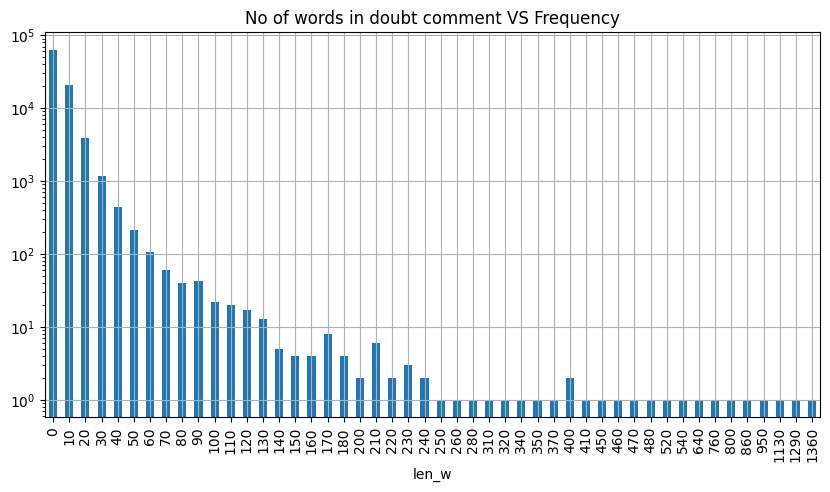

In [18]:
df[df['label']=='irrelevant']['len_w'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), logy=True, grid=True, title='No of words in doubt comment VS Frequency')

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

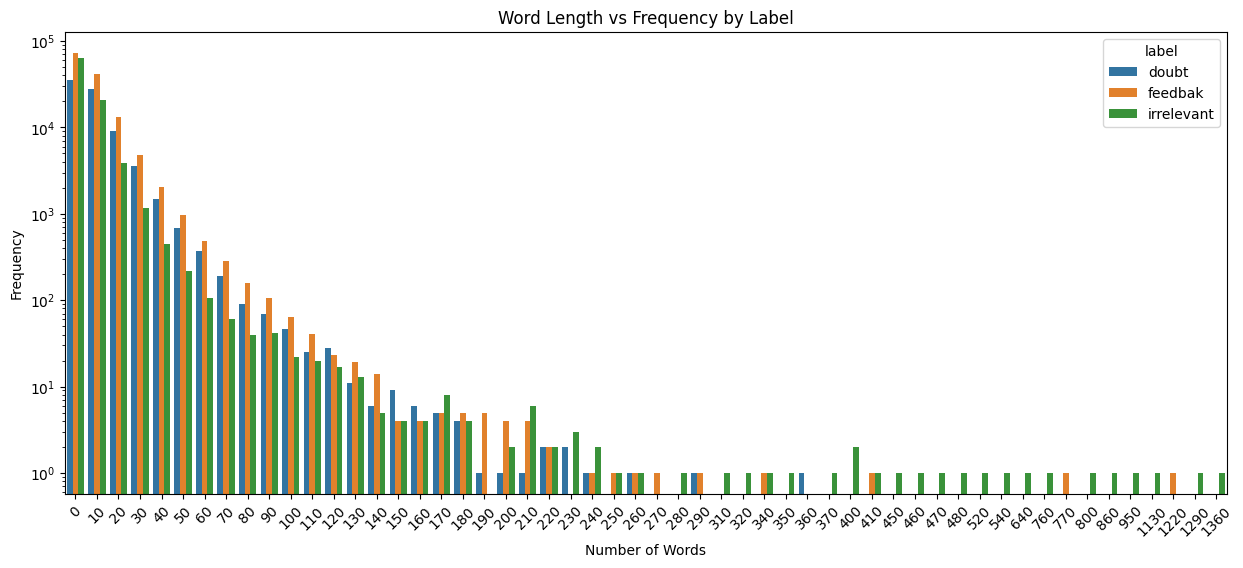

In [20]:
# Step 2: Create a DataFrame with word lengths and labels
word_length_data = df.groupby(['label', 'len_w']).size().reset_index(name='frequency')

# Step 3: Plotting
plt.figure(figsize=(15, 6))
sns.barplot(data=word_length_data, x='len_w', y='frequency', hue='label')

# Set plot labels and title
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Word Length vs Frequency by Label')
plt.xticks(rotation=45)  # Rotating the x-axis labels by 45 degrees
plt.yscale('log')
# Display plot
plt.show()


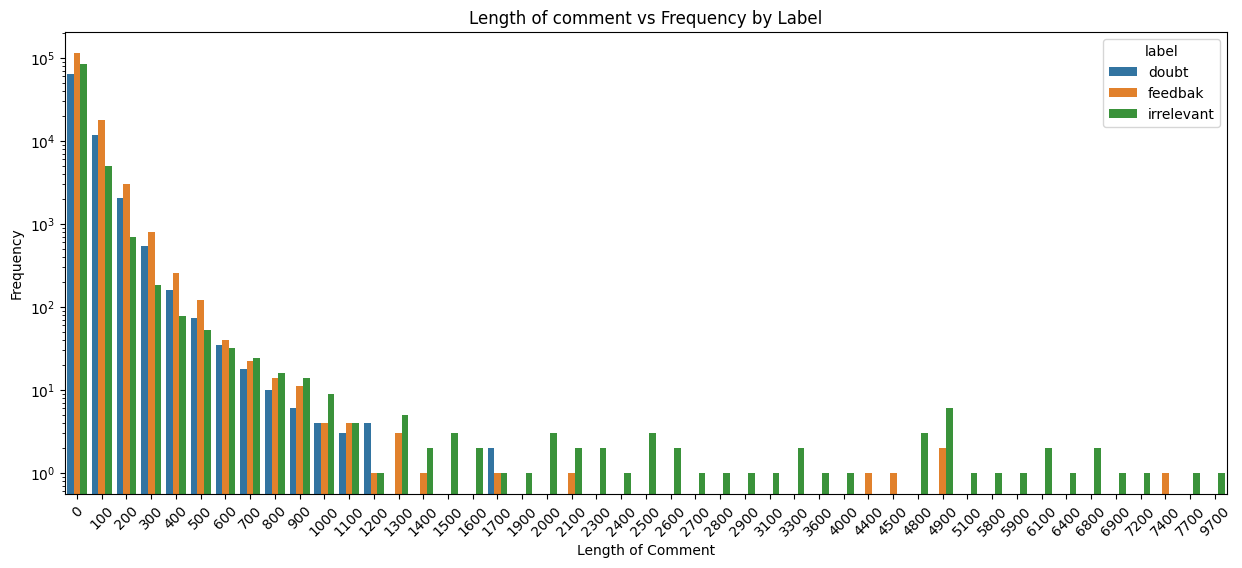

In [21]:
# Step 2: Create a DataFrame with word lengths and labels
comment_length_data = df.groupby(['label', 'len_c']).size().reset_index(name='frequency')

# Step 3: Plotting
plt.figure(figsize=(15, 6))
sns.barplot(data=comment_length_data, x='len_c', y='frequency', hue='label')

# Set plot labels and title
plt.xlabel('Length of Comment')
plt.ylabel('Frequency')
plt.title('Length of comment vs Frequency by Label')
plt.xticks(rotation=45)  # Rotating the x-axis labels by 45 degrees
plt.yscale('log')
# Display plot
plt.show()